# INFO 3402 – Week 15: Lecture - Solutions

[Brian C. Keegan, Ph.D.](http://brianckeegan.com/)  
[Assistant Professor, Department of Information Science](https://www.colorado.edu/cmci/people/information-science/brian-c-keegan)  
University of Colorado Boulder  

Copyright and distributed under an [MIT License](https://opensource.org/licenses/MIT)
We are going to discuss how to process large text documents using athe [Natural Language Toolkit](http://www.nltk.org) library. 

## Download NLTK corpora

NLTK should be included by default with you Anaconda distribution. If it isn't for some reason, at a Terminal prompt try:

`conda install nltk`

In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

We first have to download some data corpora and libraries to use NLTK. Running this block of code *should* pop up a new window with four blue tabs: Collections, Corpora, Models, All Packages. Under Collections, Select the entry with "book" in the Identifier column and select download. Once the status "Finished downloading collection 'book'." prints in the grey bar at the bottom, you can close this pop-up.

![](http://www.nltk.org/images/nltk-downloader.png)

In [2]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/briankeegan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

You should only need to do the download step once. In the future, you can start from the cell below.

In [1]:
from collections import Counter
import re
import string
import nltk
import requests
import json
import os

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from nltk.book import text1, text2, text3, text4, text5, text6, text7, text8, text9
text_list = [text1, text2, text3, text4, text5, text6, text7, text8, text9]

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


We can also download text from the web and load it into a NLTK Text object. Let's get something from [Project Gutenberg's Top 100 list](https://www.gutenberg.org/browse/scores/top), like Charles Dickens's "A Tale of Two Cities."

In [5]:
# Get the text file from the web
atotc_raw = requests.get('https://www.gutenberg.org/files/98/98-0.txt').text

atotc_raw

'ï»¿The Project Gutenberg eBook of A Tale of Two Cities, by Charles Dickens\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org. If you are not located in the United States, you\r\nwill have to check the laws of the country where you are located before\r\nusing this eBook.\r\n\r\nTitle: A Tale of Two Cities\r\n       A Story of the French Revolution\r\n\r\nAuthor: Charles Dickens\r\n\r\nRelease Date: January, 1994 [eBook #98]\r\n[Most recently updated: December 20, 2020]\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\nProduced by: Judith Boss and David Widger\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK A TALE OF TWO CITIES ***\r\n\r\n\r\n\r\n\r\nA TALE OF TWO CITIES\r\n\r\nA STORY OF THE FRENCH R

In [6]:
# Write a regular expression to get everything between these two lines of text
atotc_core = re.search(
    r"(CHAPTER I.\r\nThe Period.*)END OF THE PROJECT GUTENBERG EBOOK A TALE OF TWO CITIES.*$",
    atotc_raw, re.S).groups()[0]

atotc_core

'CHAPTER I.\r\nThe Period\r\n\r\n\r\nIt was the best of times, it was the worst of times, it was the age of\r\nwisdom, it was the age of foolishness, it was the epoch of belief, it\r\nwas the epoch of incredulity, it was the season of Light, it was the\r\nseason of Darkness, it was the spring of hope, it was the winter of\r\ndespair, we had everything before us, we had nothing before us, we were\r\nall going direct to Heaven, we were all going direct the other way--in\r\nshort, the period was so far like the present period, that some of its\r\nnoisiest authorities insisted on its being received, for good or for\r\nevil, in the superlative degree of comparison only.\r\n\r\nThere were a king with a large jaw and a queen with a plain face, on the\r\nthrone of England; there were a king with a large jaw and a queen with\r\na fair face, on the throne of France. In both countries it was clearer\r\nthan crystal to the lords of the State preserves of loaves and fishes,\r\nthat things in genera

In [7]:
# Tokenize the raw text
atotc_tokenized = nltk.word_tokenize(atotc_core)

atotc_tokenized

['CHAPTER',
 'I',
 '.',
 'The',
 'Period',
 'It',
 'was',
 'the',
 'best',
 'of',
 'times',
 ',',
 'it',
 'was',
 'the',
 'worst',
 'of',
 'times',
 ',',
 'it',
 'was',
 'the',
 'age',
 'of',
 'wisdom',
 ',',
 'it',
 'was',
 'the',
 'age',
 'of',
 'foolishness',
 ',',
 'it',
 'was',
 'the',
 'epoch',
 'of',
 'belief',
 ',',
 'it',
 'was',
 'the',
 'epoch',
 'of',
 'incredulity',
 ',',
 'it',
 'was',
 'the',
 'season',
 'of',
 'Light',
 ',',
 'it',
 'was',
 'the',
 'season',
 'of',
 'Darkness',
 ',',
 'it',
 'was',
 'the',
 'spring',
 'of',
 'hope',
 ',',
 'it',
 'was',
 'the',
 'winter',
 'of',
 'despair',
 ',',
 'we',
 'had',
 'everything',
 'before',
 'us',
 ',',
 'we',
 'had',
 'nothing',
 'before',
 'us',
 ',',
 'we',
 'were',
 'all',
 'going',
 'direct',
 'to',
 'Heaven',
 ',',
 'we',
 'were',
 'all',
 'going',
 'direct',
 'the',
 'other',
 'way',
 '--',
 'in',
 'short',
 ',',
 'the',
 'period',
 'was',
 'so',
 'far',
 'like',
 'the',
 'present',
 'period',
 ',',
 'that',
 'some',

In [8]:
# Convert to a nltk Text object
text10 = nltk.Text(atotc_tokenized)

# Give the text a formal name, like the other text objects
text10.name = 'A Tale of Two Cities by Charles Dickens 1859'

In [9]:
# Add this text object to the text_list
text_list.append(text10)

How long is each body of text? We can use `len` on a `Text` object.

In [10]:
for t in text_list:
    print("{0} has {1:,} words\n".format(t.name,len(t)))

Moby Dick by Herman Melville 1851 has 260,819 words

Sense and Sensibility by Jane Austen 1811 has 141,576 words

The Book of Genesis has 44,764 words

Inaugural Address Corpus has 152,901 words

Chat Corpus has 45,010 words

Monty Python and the Holy Grail has 16,967 words

Wall Street Journal has 100,676 words

Personals Corpus has 4,867 words

The Man Who Was Thursday by G . K . Chesterton 1908 has 69,213 words

A Tale of Two Cities by Charles Dickens 1859 has 160,511 words



How many unique words in each text document? We can call `set` on a Text object.

In [11]:
for t in text_list:
    print("{0} has {1:,} unique words\n".format(t.name,len(set(t))))

Moby Dick by Herman Melville 1851 has 19,317 unique words

Sense and Sensibility by Jane Austen 1811 has 6,833 unique words

The Book of Genesis has 2,789 unique words

Inaugural Address Corpus has 10,025 unique words

Chat Corpus has 6,066 unique words

Monty Python and the Holy Grail has 2,166 unique words

Wall Street Journal has 12,408 unique words

Personals Corpus has 1,108 unique words

The Man Who Was Thursday by G . K . Chesterton 1908 has 6,807 unique words

A Tale of Two Cities by Charles Dickens 1859 has 12,128 unique words



We can define a function that measures the [lexical diversity](https://en.wikipedia.org/wiki/Lexical_diversity) of the text by computing the number of unique words as a percentage of the total number of words. If each word was used only once, then the richness would be 100% but if the same word was repeated the entire length of the document, then the richness would be 0%.

In [12]:
def lexical_diversity(text):
    return len(set(text))/len(text)

for t in text_list:
    print("{0} has a lexical diversity of: {1:.1%}\n".format(t.name,lexical_diversity(t)))

Moby Dick by Herman Melville 1851 has a lexical diversity of: 7.4%

Sense and Sensibility by Jane Austen 1811 has a lexical diversity of: 4.8%

The Book of Genesis has a lexical diversity of: 6.2%

Inaugural Address Corpus has a lexical diversity of: 6.6%

Chat Corpus has a lexical diversity of: 13.5%

Monty Python and the Holy Grail has a lexical diversity of: 12.8%

Wall Street Journal has a lexical diversity of: 12.3%

Personals Corpus has a lexical diversity of: 22.8%

The Man Who Was Thursday by G . K . Chesterton 1908 has a lexical diversity of: 9.8%

A Tale of Two Cities by Charles Dickens 1859 has a lexical diversity of: 7.6%



What are the longest words in the text?

In [13]:
def find_longest_word(text):
    longest = ''
    for word in set(text):
        if len(word) > len(longest):
            longest = word
    return longest

for t in text_list:
    print("The longest word in {0} is: {1}\n".format(t.name,find_longest_word(t)))

The longest word in Moby Dick by Herman Melville 1851 is: uninterpenetratingly

The longest word in Sense and Sensibility by Jane Austen 1811 is: disqualifications

The longest word in The Book of Genesis is: interpretations

The longest word in Inaugural Address Corpus is: contradistinction

The longest word in Chat Corpus is: //www.wunderground.com/cgi-bin/findweather/getForecast?query=95953#FIR

The longest word in Monty Python and the Holy Grail is: Unfortunately

The longest word in Wall Street Journal is: marketing-communications

The longest word in Personals Corpus is: DISCIPLINARIAN

The longest word in The Man Who Was Thursday by G . K . Chesterton 1908 is: undenominational

The longest word in A Tale of Two Cities by Charles Dickens 1859 is: Pancras-in-the-Fields



We can also measure the frequency distribution of how often a word is used in a corpus.

In [20]:
_t = text10
fdist_text1 = nltk.FreqDist(_t)
fdist_text1.most_common(25)

[(',', 13126),
 ('the', 7391),
 ('.', 4944),
 ('and', 4793),
 ('of', 3983),
 ('to', 3419),
 ('a', 2793),
 ('in', 2463),
 ('his', 1937),
 ('â\x80\x9d', 1781),
 ('that', 1766),
 ('was', 1759),
 ('it', 1661),
 ('I', 1496),
 ('he', 1442),
 ('had', 1296),
 ('with', 1270),
 (';', 1108),
 ('you', 1107),
 ('as', 1044),
 ('her', 998),
 ('at', 978),
 ('him', 959),
 ('!', 954),
 ('?', 913)]

We can also plot the distribution of how often words occur in the corpus. We get an interesting pattern called the [Zipf distribution](https://en.wikipedia.org/wiki/Zipf%27s_law). There are many words that occur only once (upper left) and single words that occur thousands of times (lower right) but the pattern follows a consistent log-linear pattern.

Text(0, 0.5, 'Number of words')

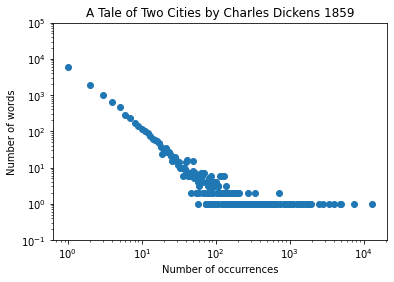

In [21]:
counter_text1 = Counter(fdist_text1.values())

f,ax = plt.subplots(1,1)
ax.scatter(list(counter_text1.keys()),list(counter_text1.values()))
ax.set_ylim((1e-1,1e5))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title(_t.name)
ax.set_xlabel('Number of occurrences')
ax.set_ylabel('Number of words')

An important part of processing natural language data is normalizing this data by removing variations in the text that the computer naively thinks are different entities but humans recognize as being the same. There are several steps to this including case adjustment and stemming/lemmatization.

In the case of case adjustment, it turns out several of the different "words" in the corpus are actually the same, but because they have different capitalizations, they're counted as different unique words. Explore how many five-letter words are the same, just with different capitalizations.

![](http://www.nltk.org/images/pipeline1.png)

## Sentence segmenting

A novel can be represented as a single large string, but this huge string isn't very helpful for analyzing features of the text until the string is segmented into sentences or "tokens", which include words but also hyphenated phrases or contractions ("aren't", "doesn't", *etc*.)

There are a variety of different segmentation/tokenization strategies (with different tradeoffs) and corresponding methods implemented in NLTK.

If we wanted to get all the sentences in a string, we could naively split the string on a period and whitespace using regular expressions.

In [24]:
for line in atotc_core.split('. ')[:5]:
    print(line)

CHAPTER I.
The Period


It was the best of times, it was the worst of times, it was the age of
wisdom, it was the age of foolishness, it was the epoch of belief, it
was the epoch of incredulity, it was the season of Light, it was the
season of Darkness, it was the spring of hope, it was the winter of
despair, we had everything before us, we had nothing before us, we were
all going direct to Heaven, we were all going direct the other way--in
short, the period was so far like the present period, that some of its
noisiest authorities insisted on its being received, for good or for
evil, in the superlative degree of comparison only.

There were a king with a large jaw and a queen with a plain face, on the
throne of England; there were a king with a large jaw and a queen with
a fair face, on the throne of France
In both countries it was clearer
than crystal to the lords of the State preserves of loaves and fishes,
that things in general were settled for ever.

It was the year of Our Lord on

This splitting method only uses space characters, but not newline characters `\r\n` to split, so it misses several sentences. We could use a regular expression to split on periods and white spaces too.

In [25]:
re.split(r'\.\s+',atotc_core)[:8]

['CHAPTER I',
 'The Period\r\n\r\n\r\nIt was the best of times, it was the worst of times, it was the age of\r\nwisdom, it was the age of foolishness, it was the epoch of belief, it\r\nwas the epoch of incredulity, it was the season of Light, it was the\r\nseason of Darkness, it was the spring of hope, it was the winter of\r\ndespair, we had everything before us, we had nothing before us, we were\r\nall going direct to Heaven, we were all going direct the other way--in\r\nshort, the period was so far like the present period, that some of its\r\nnoisiest authorities insisted on its being received, for good or for\r\nevil, in the superlative degree of comparison only',
 'There were a king with a large jaw and a queen with a plain face, on the\r\nthrone of England; there were a king with a large jaw and a queen with\r\na fair face, on the throne of France',
 'In both countries it was clearer\r\nthan crystal to the lords of the State preserves of loaves and fishes,\r\nthat things in genera

Notice this sentance tokenizing fails for a phrase like "Mrs. Southcott had recently attained her five and twentieth blessed birthday..." into two sentences, when it should be one.

NLTK has more specialized sentence tokenizers that deal with these kinds of cases. You should probably use these instead of trying to make your own.

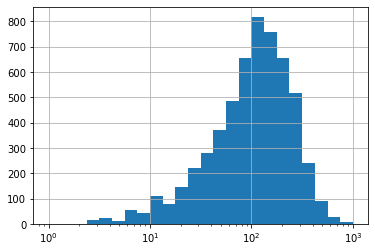

In [31]:
atotc_sentences = nltk.sent_tokenize(atotc_core)
atotc_sentence_lengths = [len(sent) for sent in atotc_sentences]
ax = pd.Series(atotc_sentence_lengths).hist(bins=np.geomspace(1,1000,25))
ax.set_xscale('log')

## Word tokenizing
We may care less about sentences and more about individual words. Again, we could employ a naive approach of splitting on spaces.

In [32]:
space_tokens = atotc_core.split(' ')
space_tokens[0:50]

['CHAPTER',
 'I.\r\nThe',
 'Period\r\n\r\n\r\nIt',
 'was',
 'the',
 'best',
 'of',
 'times,',
 'it',
 'was',
 'the',
 'worst',
 'of',
 'times,',
 'it',
 'was',
 'the',
 'age',
 'of\r\nwisdom,',
 'it',
 'was',
 'the',
 'age',
 'of',
 'foolishness,',
 'it',
 'was',
 'the',
 'epoch',
 'of',
 'belief,',
 'it\r\nwas',
 'the',
 'epoch',
 'of',
 'incredulity,',
 'it',
 'was',
 'the',
 'season',
 'of',
 'Light,',
 'it',
 'was',
 'the\r\nseason',
 'of',
 'Darkness,',
 'it',
 'was',
 'the']

Again, this misses newline separators, so we might think we could use regular expressions.

In [33]:
re_tokens = re.split(r'\s+',atotc_core)
re_tokens[0:50]

['CHAPTER',
 'I.',
 'The',
 'Period',
 'It',
 'was',
 'the',
 'best',
 'of',
 'times,',
 'it',
 'was',
 'the',
 'worst',
 'of',
 'times,',
 'it',
 'was',
 'the',
 'age',
 'of',
 'wisdom,',
 'it',
 'was',
 'the',
 'age',
 'of',
 'foolishness,',
 'it',
 'was',
 'the',
 'epoch',
 'of',
 'belief,',
 'it',
 'was',
 'the',
 'epoch',
 'of',
 'incredulity,',
 'it',
 'was',
 'the',
 'season',
 'of',
 'Light,',
 'it',
 'was',
 'the',
 'season']

It's clear we want to separate words based on other punctuation as well so that "Darkness," and "Darkness" aren't treated like separate words. Again, NLTK has a variety of methods for doing word tokenization more intelligently.

`word_tokenize` is probably the easiest-to-recommend

In [34]:
wt_tokens = nltk.word_tokenize(atotc_core)
wt_tokens[0:50]

['CHAPTER',
 'I',
 '.',
 'The',
 'Period',
 'It',
 'was',
 'the',
 'best',
 'of',
 'times',
 ',',
 'it',
 'was',
 'the',
 'worst',
 'of',
 'times',
 ',',
 'it',
 'was',
 'the',
 'age',
 'of',
 'wisdom',
 ',',
 'it',
 'was',
 'the',
 'age',
 'of',
 'foolishness',
 ',',
 'it',
 'was',
 'the',
 'epoch',
 'of',
 'belief',
 ',',
 'it',
 'was',
 'the',
 'epoch',
 'of',
 'incredulity',
 ',',
 'it',
 'was',
 'the']

But there are others like `wordpunct_tokenize` tha makes different assumptions about the language.

In [35]:
wpt_tokens = nltk.wordpunct_tokenize(atotc_core)
wpt_tokens[0:50]

['CHAPTER',
 'I',
 '.',
 'The',
 'Period',
 'It',
 'was',
 'the',
 'best',
 'of',
 'times',
 ',',
 'it',
 'was',
 'the',
 'worst',
 'of',
 'times',
 ',',
 'it',
 'was',
 'the',
 'age',
 'of',
 'wisdom',
 ',',
 'it',
 'was',
 'the',
 'age',
 'of',
 'foolishness',
 ',',
 'it',
 'was',
 'the',
 'epoch',
 'of',
 'belief',
 ',',
 'it',
 'was',
 'the',
 'epoch',
 'of',
 'incredulity',
 ',',
 'it',
 'was',
 'the']

Or `Toktok` is still another word tokenizer.

In [36]:
toktok = nltk.ToktokTokenizer()
ttt_tokens = toktok.tokenize(atotc_core)
ttt_tokens[0:50]

['CHAPTER',
 'I.',
 'The',
 'Period',
 'It',
 'was',
 'the',
 'best',
 'of',
 'times',
 ',',
 'it',
 'was',
 'the',
 'worst',
 'of',
 'times',
 ',',
 'it',
 'was',
 'the',
 'age',
 'of',
 'wisdom',
 ',',
 'it',
 'was',
 'the',
 'age',
 'of',
 'foolishness',
 ',',
 'it',
 'was',
 'the',
 'epoch',
 'of',
 'belief',
 ',',
 'it',
 'was',
 'the',
 'epoch',
 'of',
 'incredulity',
 ',',
 'it',
 'was',
 'the',
 'season']

Each of these different methods returns a different word count based on their different assumptions about word boundaries, etc.

In [37]:
for name,tokenlist in zip(['space_split','re_tokenizer','word_tokenizer','wordpunct_tokenizer','toktok_tokenizer'],[space_tokens,re_tokens,wt_tokens,wpt_tokens,ttt_tokens]):
    print("{0:>20}: {1:,} words".format(name,len(tokenlist)))

         space_split: 123,461 words
        re_tokenizer: 135,643 words
      word_tokenizer: 160,511 words
 wordpunct_tokenizer: 175,774 words
    toktok_tokenizer: 154,257 words


In [40]:
set(wpt_tokens) - set(ttt_tokens)

{'!),',
 '!--',
 '),',
 ',--',
 '-',
 '--!',
 '--?',
 '.',
 '.!',
 '.)',
 '.,',
 '.--',
 '.;',
 '1792',
 ':--',
 ';--',
 '?--',
 'ACQUITTED',
 'Accursed',
 'Adam',
 'Adieu',
 'Advocate',
 'Age',
 'Agicultooral',
 'Aha',
 'Al',
 'Alarm',
 'Alone',
 'Americans',
 'Angelâ',
 'Answer',
 'Antoineâ',
 'Anxious',
 'Arrested',
 'Ashantee',
 'Assuredly',
 'Attorney',
 'Aulnais',
 'B',
 'BARSADâ',
 'BLOOD',
 'Bad',
 'Banker',
 'Barbarous',
 'Barriers',
 'Barsadâ',
 'Blackheath',
 'Blacksmithâ',
 'Blest',
 'Boulogne',
 'Brave',
 'Bravo',
 'Brother',
 'Brothersâ',
 'Bullâ',
 'Buried',
 'C',
 'Canâ',
 'Captainâ',
 'Cartonâ',
 'Changed',
 'Charlesâ',
 'Children',
 'Choice',
 'Cinderellaâ',
 'Clearly',
 'Clock',
 'Close',
 'Clyâ',
 'Co',
 'Cock',
 'Coming',
 'Commence',
 'Committee',
 'Companyâ',
 'Cook',
 'Council',
 'Cruncherâ',
 'Custom',
 'DEAREST',
 'DIG',
 'Dare',
 'Darnayâ',
 'Dearest',
 'Deathâ',
 'Defargeâ',
 'Detestation',
 'Didnâ',
 'Dinner',
 'Doctorâ',
 'Donâ',
 'Draw',
 'Drive',
 'Dull'

### Mixed cases

Remember that strings of different cases (capitalizations) are treated as different words: "young" and "Young" are not the same. An important part of text processing is to remove un-needed variation, and mixed cases are variation we generally don't care about.

In [41]:
five_letter_words = [word for word in set(text1) if len(word) == 5]

print("There are {0:,} five-letter words in the corpus.".format(len(five_letter_words)))

There are 2,397 five-letter words in the corpus.


In [42]:
mixed_case_tokens = []

for word1 in five_letter_words:
    for word2 in five_letter_words:
        if word1.lower() == word2.lower() and word1 != word2:
            mixed_case_tokens.append((word1,word2))

print("There are {0:,} five-letter words in the corpus that are the same but have different cases.".format(len(mixed_case_tokens)))
mixed_case_tokens[:10]

There are 924 five-letter words in the corpus that are the same but have different cases.


[('Banks', 'BANKS'),
 ('Banks', 'banks'),
 ('Eagle', 'eagle'),
 ('Since', 'since'),
 ('South', 'SOUTH'),
 ('South', 'south'),
 ('VEINS', 'veins'),
 ('times', 'TIMES'),
 ('Whose', 'whose'),
 ('Heads', 'heads')]

How does the number of words in the document change after applying `.lower()` to everything?

In [43]:
text1_lowered = [i.lower() for i in text1.tokens]
formatted_str = "There are {0:,} unique words in text1 before lowering and {1:,} after lowering"
print(formatted_str.format(len(set(text1)),len(set(text1_lowered))))

There are 19,317 unique words in text1 before lowering and 17,231 after lowering


### Removing stopwords

English, like many languages, repeats many words in typical language that don't always convey a lot of information by themselves. When we do text processing, we should make sure to remove these "stop words".

In [44]:
fdist_text10 = nltk.FreqDist(text10)
fdist_text10.most_common(25)

[(',', 13126),
 ('the', 7391),
 ('.', 4944),
 ('and', 4793),
 ('of', 3983),
 ('to', 3419),
 ('a', 2793),
 ('in', 2463),
 ('his', 1937),
 ('â\x80\x9d', 1781),
 ('that', 1766),
 ('was', 1759),
 ('it', 1661),
 ('I', 1496),
 ('he', 1442),
 ('had', 1296),
 ('with', 1270),
 (';', 1108),
 ('you', 1107),
 ('as', 1044),
 ('her', 998),
 ('at', 978),
 ('him', 959),
 ('!', 954),
 ('?', 913)]

NLTK helpfully has a list of stopwords in different languages.

In [51]:
english_stopwords = nltk.corpus.stopwords.words('english')
english_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

We can also use `string` module's "punctuation" attribute as well.

In [53]:
list(string.punctuation)

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

Let's combine them so get a list of `all_stopwords` that we can ignore.

In [55]:
all_stopwords = english_stopwords + list(string.punctuation)

We can use a list comprehension to exclude the words in this stopword list from analysis while also gives each word similar cases. This is not perfect, but an improvement over what we had before.

In [56]:
text10_no_stopwords = [word.lower() for word in text10 if word.lower() not in all_stopwords]
fdist_text10_no_stopwords = nltk.FreqDist(text10_no_stopwords)
fdist_text10_no_stopwords.most_common(50)

[('â\x80\x9d', 1781),
 ('--', 720),
 ('said', 660),
 ('mr.', 606),
 ('one', 422),
 ('â\x80\x9ci', 406),
 ('would', 339),
 ('lorry', 333),
 ('upon', 286),
 ('could', 281),
 ('defarge', 277),
 ('man', 273),
 ('little', 265),
 ('time', 258),
 ('hand', 244),
 ('know', 223),
 ('miss', 220),
 ('like', 205),
 ('two', 204),
 ('looked', 195),
 ('long', 188),
 ('madame', 186),
 ('way', 185),
 ('face', 185),
 ('made', 184),
 ('never', 183),
 ('see', 182),
 ('much', 180),
 ('night', 180),
 ('old', 180),
 ('good', 179),
 ('doctor', 179),
 ('head', 173),
 ('day', 167),
 ('eyes', 164),
 ('great', 161),
 ('father', 156),
 ('say', 152),
 ('manette', 151),
 ('pross', 150),
 ('life', 146),
 ('might', 144),
 ('carton', 143),
 ('â\x80\x9cyou', 142),
 ('came', 141),
 ('many', 141),
 ('come', 140),
 ('darnay', 138),
 ('well', 137),
 ('people', 135)]

### Stemming and lemmatization
Another problem with natural language text is plural (dogs vs. dog) and possessive (dog's vs. dog) forms, verb conjugations (walk, walks, walked, walking), and contractions (they're) are also counted as unique words even if the underlying concepts are similar. Extracting [word stems](https://en.wikipedia.org/wiki/Word_stem) means removing prefixes and affixes that result in a new token, but not a significantly new meaning.

We can use a variety of [stemming](https://en.wikipedia.org/wiki/Stemming) and [lemmatization](https://en.wikipedia.org/wiki/Lemmatisation) tools in NLTK to try to recover unique words stripped of any prefixes or suffixes.

In [57]:
[t.lower() for t in text1.tokens[:50] if len(t) > 2]

['moby',
 'dick',
 'herman',
 'melville',
 '1851',
 'etymology',
 'supplied',
 'late',
 'consumptive',
 'usher',
 'grammar',
 'school',
 'the',
 'pale',
 'usher',
 'threadbare',
 'coat',
 'heart',
 'body',
 'and',
 'brain',
 'see',
 'him',
 'now',
 'was',
 'ever',
 'dusting',
 'his',
 'old',
 'lexicons',
 'and']

In [58]:
porter = nltk.PorterStemmer()

[porter.stem(t.lower()) for t in text1.tokens[:50] if len(t) > 2]

['mobi',
 'dick',
 'herman',
 'melvil',
 '1851',
 'etymolog',
 'suppli',
 'late',
 'consumpt',
 'usher',
 'grammar',
 'school',
 'the',
 'pale',
 'usher',
 'threadbar',
 'coat',
 'heart',
 'bodi',
 'and',
 'brain',
 'see',
 'him',
 'now',
 'wa',
 'ever',
 'dust',
 'hi',
 'old',
 'lexicon',
 'and']

After stemming the words in `text1`, how many unique words remain? 

Nearly half of the words in *Moby Dick* that were initially counted as unique were actually duplicates of other words!

In [59]:
text1_lowered_stemmed = set()

for t in set(text1):
    t_lower = t.lower()
    t_stemmed = porter.stem(t_lower)
    text1_lowered_stemmed.add(t_stemmed)
    
print("There are {0:,} unique words in text1 before and {1:,} after lowering and stemming".format(len(set(text1)),len(set(text1_lowered_stemmed))))

There are 19,317 unique words in text1 before and 10,927 after lowering and stemming


Lemmatization is a bit smarter about removing letters: it checks if the word is a plural, conjugation, etc. of another word and them "stems" it down to the root word only if in the dictionary. These lookups are expensive in comparision to basically slicing characters off a list like stemming, but results in better quality — but far from perfect — results. For example, "supplied" should have been reduced to "supply". "Dusting" should lemmatize to "dust", *etc*.

In [4]:
wnl = nltk.WordNetLemmatizer()

[wnl.lemmatize(t.lower()) for t in text1.tokens[:50] if len(t) > 2]

['moby',
 'dick',
 'herman',
 'melville',
 '1851',
 'etymology',
 'supplied',
 'late',
 'consumptive',
 'usher',
 'grammar',
 'school',
 'the',
 'pale',
 'usher',
 'threadbare',
 'coat',
 'heart',
 'body',
 'and',
 'brain',
 'see',
 'him',
 'now',
 'wa',
 'ever',
 'dusting',
 'his',
 'old',
 'lexicon',
 'and']

In [13]:
wnl.lemmatize('dusting',pos='v')

'dust'

After lemmatizing the words in `text1`, how many unique words remain? Lemmatizing isn't as aggressive as stemming, but there's still a 25% reduction in the total number of unique words!

In [14]:
text1_lowered_lemmatized = set()

for t in set(text1):
    t_lower = t.lower()
    t_lemmatized = wnl.lemmatize(t_lower)
    text1_lowered_lemmatized.add(t_lemmatized)
    
print("There are {0:,} unique words in text1 before and {1:,} after lowering and stemming".format(len(set(text1)),len(set(text1_lowered_lemmatized))))

There are 19,317 unique words in text1 before and 15,168 after lowering and stemming


## Document collections

Sometimes we want to analyze collections of documents rather than a single large document. A set of tweets is a good example: each tweet is a document and all the tweets from an account is a collection.

In [15]:
tweets_df = pd.read_csv('politician_tweets.csv',parse_dates=['timestamp'],dtype={'id':'str'})
tweets_df.head()

/var/folders/lr/v195xr617d32k2zdwwh30sb40000gn/T/ipykernel_26205/2159262898.py:1: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets_df = pd.read_csv('politician_tweets.csv',parse_dates=['timestamp'],dtype={'id':'str'})


,created_at,hashtags,mentions,favorites,id,reply_screen_name,reply_status_id,retweets,screen_name,source,text,truncated,timestamp
0,1217870931,[],[],0.0,877418565,NaN,NaN,0.0,JohnBoozman,Twitter Web Client,On a conference call about a weekend trip to I...,False,2008-08-04 17:28:51
1,1218049485,[],[],0.0,879618172,NaN,NaN,0.0,JohnBoozman,Twitter Web Client,Being interviewed by KTHV,False,2008-08-06 19:04:45
2,1218054936,[],[],0.0,879695803,NaN,NaN,0.0,JohnBoozman,Twitter Web Client,Being interviewed by KARN on his Arkansas Worl...,False,2008-08-06 20:35:36
3,1218117172,[],[],0.0,880393665,NaN,NaN,0.0,JohnBoozman,Twitter Web Client,"On KWHN in Fort Smith, that's 1320 AM",False,2008-08-07 13:52:52
4,1218121925,[],[],0.0,880474266,NaN,NaN,0.0,JohnBoozman,Twitter Web Client,Attending a Military of the Purple Heart Cerem...,False,2008-08-07 15:12:05


In [37]:
s = pd.Series(["one;two;three","four;five;six"])
s

0    one;two;three
1    four;five;six
dtype: object

In [40]:
s.str.split(';').str.join(', ')

0    one, two, three
1    four, five, six
dtype: object

Make a plot of daily tweeting activity.

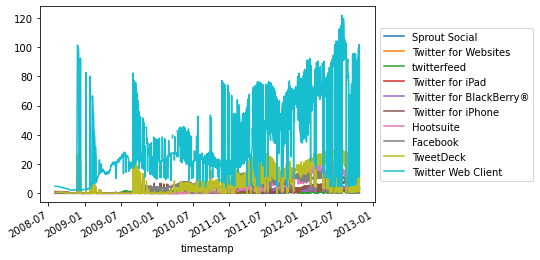

In [83]:
gb = tweets_df.groupby(['source',pd.Grouper(key='timestamp',freq='D')]).agg({'id':'nunique'})#['id'].rolling(30).mean().plot()
gb_unstack = gb['id'].unstack(0)
top_sources = gb_unstack.sum().sort_values().tail(10).index

ax = gb_unstack[top_sources].fillna(0).rolling(30).mean().plot()
ax.legend(loc='center left',bbox_to_anchor=(1,.5))
# ax.set_ylabel('Tweets')

In [73]:
tweets_df['source'].value_counts().head(20)

Twitter for iPad             102787
Twitter Web Client            56229
TweetDeck                     12955
Facebook                       8432
Hootsuite                      7078
Twitter for iPhone             3011
Twitter for BlackBerry®        2128
twitterfeed                    1204
Twitter for Websites           1160
Sprout Social                   935
Twitpic                         927
Twitter for Android             416
Twitter for Mac                 415
Mobile Web                      339
Ping.fm                         320
UberSocial for BlackBerry       248
UberSocial Pro for iPhone       243
Echofon                         227
Cloudhopper                     224
Amplify                         207
Name: source, dtype: int64

In [71]:
tweets_df['screen_name'].value_counts().head(20)

DevinNunes         102172
RepKenMarchant       2026
RobWittman           1971
RepBillShuster       1678
JerryBrownGov        1509
TomRooney            1417
RepTomGraves         1355
clairecmc            1324
GovMarkDayton        1320
maziehirono          1320
RepDavid             1307
VernBuchanan         1305
virginiafoxx         1246
RepMikeCoffman       1239
KimReynoldsIA        1213
RepMikeRogersAL      1157
JayInslee            1146
henrymcmaster        1119
RepPeteKing          1080
govsambrownback      1049
Name: screen_name, dtype: int64

### Sentiment analysis

In [84]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [97]:
tweets_df.loc[50000,'text']

'Today I voted to protect US job creators from another job-killing #regulation on #businesses. Read why: http://t.co/SPIPhfqc #4jobs'

In [98]:
sid.polarity_scores(text = tweets_df.loc[50000,'text'])

{'neg': 0.0, 'neu': 0.86, 'pos': 0.14, 'compound': 0.3818}

In [99]:
def get_compound_score(text):
    try:
        return sid.polarity_scores(text)['compound']
    except:
        return np.nan

In [100]:
# This might take 20-30 seconds
tweets_df['compound_sentiment'] = tweets_df['text'].apply(get_compound_score)

<AxesSubplot:>

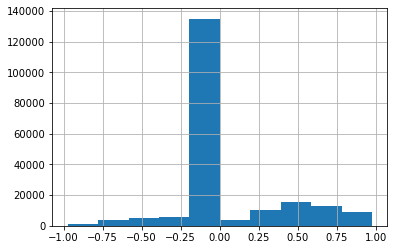

In [101]:
tweets_df['compound_sentiment'].hist()

<AxesSubplot:xlabel='timestamp'>

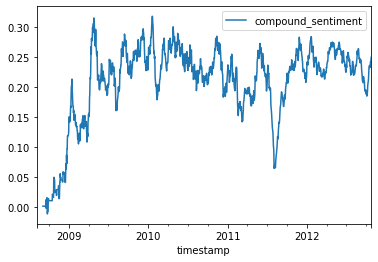

In [104]:
tweets_df.groupby(pd.Grouper(key='timestamp',freq='D')).agg({'compound_sentiment':'mean'}).fillna(0).rolling(30).mean().plot()

## Exercise

Download the raw text for "The Importance of Being Earnest" from [Project Gutenberg](http://www.gutenberg.org/cache/epub/844/pg844.txt) and save it as `tiobe_raw`.

In [42]:
tiobe_raw = requests.get('https://www.gutenberg.org/cache/epub/844/pg844.txt').text
print(tiobe_raw)

﻿The Project Gutenberg eBook, The Importance of Being Earnest, by Oscar
Wilde


This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org





Title: The Importance of Being Earnest
       A Trivial Comedy for Serious People


Author: Oscar Wilde



Release Date: August 29, 2006  [eBook #844]

Language: English

Character set encoding: ISO-646-US (US-ASCII)


***START OF THE PROJECT GUTENBERG EBOOK THE IMPORTANCE OF BEING EARNEST***






Transcribed from the 1915 Methuen & Co. Ltd. edition by David Price,
email ccx074@pglaf.org





The Importance of Being Earnest
A Trivial Comedy for Serious People


THE PERSONS IN THE PLAY


John Worthing, J.P.
Algernon Moncrieff
Rev. Canon Chasuble, D.D.
Merriman, Butler
Lane, Manservant
Lady Bracknell
Hon. Gwendolen Fairfax
Cecily Cardew
Miss Prism, Governess


In [75]:
s = pd.Series(['apple','banana','cantaloupe','durian'])
s

0         apple
1        banana
2    cantaloupe
3        durian
dtype: object

In [79]:
s.str.cat(sep = ', ')

'apple, banana, cantaloupe, durian'

Adapt the regular expression used previously to get all the text between "FIRST ACT" and "END OF THE PROJECT GUTENBERG EBOOK THE IMPORTANCE OF BEING EARNEST" and save it as `tiobe_core`.

In [43]:
# Write a regular expression to get everything between these two lines of text
tiobe_core = re.search(
    r"(THE SCENES OF THE PLAY.*)END OF THE PROJECT GUTENBERG EBOOK THE IMPORTANCE OF BEING EARNEST.*$",
    tiobe_raw, re.S).groups()[0]

tiobe_core

"THE SCENES OF THE PLAY\r\n\r\n\r\nACT I.  Algernon Moncrieff's Flat in Half-Moon Street, W.\r\n\r\nACT II.  The Garden at the Manor House, Woolton.\r\n\r\nACT III.  Drawing-Room at the Manor House, Woolton.\r\n\r\nTIME: The Present.\r\n\r\n\r\n\r\n\r\nLONDON: ST. JAMES'S THEATRE\r\n\r\n\r\nLessee and Manager: Mr. George Alexander\r\n\r\nFebruary 14th, 1895\r\n\r\n* * * * *\r\n\r\nJohn Worthing, J.P.: Mr. George Alexander.\r\nAlgernon Moncrieff: Mr. Allen Aynesworth.\r\nRev. Canon Chasuble, D.D.: Mr. H. H. Vincent.\r\nMerriman: Mr. Frank Dyall.\r\nLane: Mr. F. Kinsey Peile.\r\nLady Bracknell: Miss Rose Leclercq.\r\nHon. Gwendolen Fairfax: Miss Irene Vanbrugh.\r\nCecily Cardew: Miss Evelyn Millard.\r\nMiss Prism: Mrs. George Canninge.\r\n\r\n\r\n\r\n\r\nFIRST ACT\r\n\r\n\r\nSCENE\r\n\r\n\r\nMorning-room in Algernon's flat in Half-Moon Street.  The room is\r\nluxuriously and artistically furnished.  The sound of a piano is heard in\r\nthe adjoining room.\r\n\r\n[Lane is arranging afterno

In [46]:
nltk.word_tokenize(tiobe_core)

['THE',
 'SCENES',
 'OF',
 'THE',
 'PLAY',
 'ACT',
 'I.',
 'Algernon',
 'Moncrieff',
 "'s",
 'Flat',
 'in',
 'Half-Moon',
 'Street',
 ',',
 'W.',
 'ACT',
 'II',
 '.',
 'The',
 'Garden',
 'at',
 'the',
 'Manor',
 'House',
 ',',
 'Woolton',
 '.',
 'ACT',
 'III',
 '.',
 'Drawing-Room',
 'at',
 'the',
 'Manor',
 'House',
 ',',
 'Woolton',
 '.',
 'TIME',
 ':',
 'The',
 'Present',
 '.',
 'LONDON',
 ':',
 'ST.',
 'JAMES',
 "'S",
 'THEATRE',
 'Lessee',
 'and',
 'Manager',
 ':',
 'Mr.',
 'George',
 'Alexander',
 'February',
 '14th',
 ',',
 '1895',
 '*',
 '*',
 '*',
 '*',
 '*',
 'John',
 'Worthing',
 ',',
 'J.P.',
 ':',
 'Mr.',
 'George',
 'Alexander',
 '.',
 'Algernon',
 'Moncrieff',
 ':',
 'Mr.',
 'Allen',
 'Aynesworth',
 '.',
 'Rev',
 '.',
 'Canon',
 'Chasuble',
 ',',
 'D.D',
 '.',
 ':',
 'Mr.',
 'H.',
 'H.',
 'Vincent',
 '.',
 'Merriman',
 ':',
 'Mr.',
 'Frank',
 'Dyall',
 '.',
 'Lane',
 ':',
 'Mr.',
 'F.',
 'Kinsey',
 'Peile',
 '.',
 'Lady',
 'Bracknell',
 ':',
 'Miss',
 'Rose',
 'Leclercq'

Combine all the text processing steps into one function that accepts a string like `tiobe_core` and returns a list of lower-cased, stopword-removed, and lemmatized tokens.

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [51]:
nltk.corpus.stopwords.words('english') + list(string.punctuation)

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [54]:
def text_cleanup(text):
    # lower-case
    text_clean = text.lower()
    
    # tokenize
    text_clean = nltk.word_tokenize(text_clean)
    
    # remove stopwords
    all_stopwords = nltk.corpus.stopwords.words('english') + list(string.punctuation)
    text_clean = [word for word in text_clean if word not in all_stopwords]
    
    # lemmatize tokens
    text_clean = [wnl.lemmatize(word) for word in text_clean]
    
    return text_clean

AttributeError: 'Text' object has no attribute 'text'

Run the function on `tiobe_core`.

['scene',
 'play',
 'act',
 'i.',
 'algernon',
 'moncrieff',
 "'s",
 'flat',
 'half-moon',
 'street',
 'w.',
 'act',
 'ii',
 'garden',
 'manor',
 'house',
 'woolton',
 'act',
 'iii',
 'drawing-room',
 'manor',
 'house',
 'woolton',
 'time',
 'present',
 'london',
 'st.',
 'james',
 "'s",
 'theatre',
 'lessee',
 'manager',
 'mr.',
 'george',
 'alexander',
 'february',
 '14th',
 '1895',
 'john',
 'worthing',
 'j.p.',
 'mr.',
 'george',
 'alexander',
 'algernon',
 'moncrieff',
 'mr.',
 'allen',
 'aynesworth',
 'rev',
 'canon',
 'chasuble',
 'd.d',
 'mr.',
 'h.',
 'h.',
 'vincent',
 'merriman',
 'mr.',
 'frank',
 'dyall',
 'lane',
 'mr.',
 'f.',
 'kinsey',
 'peile',
 'lady',
 'bracknell',
 'miss',
 'rose',
 'leclercq',
 'hon',
 'gwendolen',
 'fairfax',
 'miss',
 'irene',
 'vanbrugh',
 'cecily',
 'cardew',
 'miss',
 'evelyn',
 'millard',
 'miss',
 'prism',
 'mrs.',
 'george',
 'canninge',
 'first',
 'act',
 'scene',
 'morning-room',
 'algernon',
 "'s",
 'flat',
 'half-moon',
 'street',
 'ro

Use the `Counter` function on `cleaned_tokens` to count how often each cleaned token occurs.

In [64]:
most_common = pd.Series(Counter(text_cleanup(tiobe_core))).sort_values(ascending=False)

Plot the word frequency distribution for the 50-most frequent words.

<AxesSubplot:>

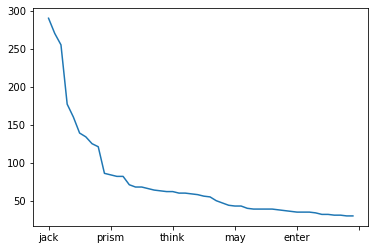

In [65]:
most_common.head(50).plot()

Plot a distribution of the frequencies themselves. This is a classic distribution found throughout information science.

In [71]:
pd.Series(Counter(most_common.values)).sort_values(ascending=False)

1     1147
2      463
3      187
4      106
5       75
      ... 
44       1
40       1
38       1
37       1
34       1
Length: 66, dtype: int64